# Face landmark 
keypoint detection으로 얼굴의 주요 부분인 눈 코 입을 검출

# 주요 논문
* [](https://www.csc.kth.se/~vahidk/papers/KazemiCVPR14.pdf)

# 실습
## HOG로 얼굴 검출

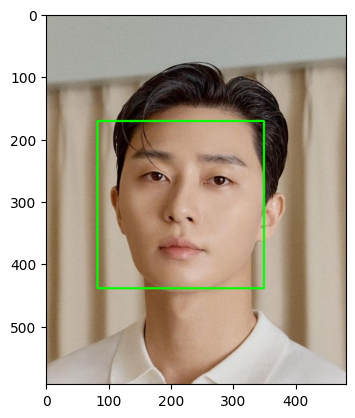

In [21]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리


# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
img = cv2.imread("./sample.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img, 1)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img)

## 얼굴에서 랜드마크 인식
### dlib에서 제공하는 데이터셋 다운로드

In [9]:
#!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d ./shape_predictor_68_face_landmarks.dat.bz2

### 랜드마크검출과 비주얼라이징

(1, 68, 2)


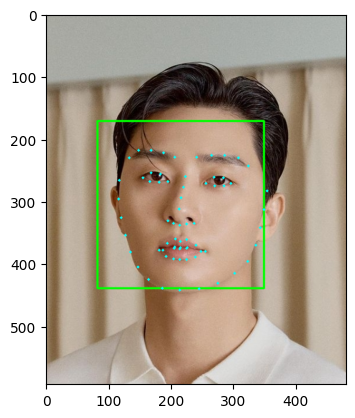

In [12]:
model_path = "./shape_predictor_68_face_landmarks.dat"

r"""
landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
dlib.rectangle: 내부를 예측하는 박스
dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
"""
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

landmarks = np.array(list_landmarks)

# 한개의 얼굴, 68개의 랜드마크 점에 대해 x, y 좌표
print(landmarks.shape)

for i in range(landmarks.shape[0]):
    for p in range(landmarks.shape[1]):
        x = landmarks[i][p][0]
        y = landmarks[i][p][1]
        cv2.circle(img, (x, y), 2, (0, 255, 255), -1)
plt.imshow(img)

## 스티커씌우기

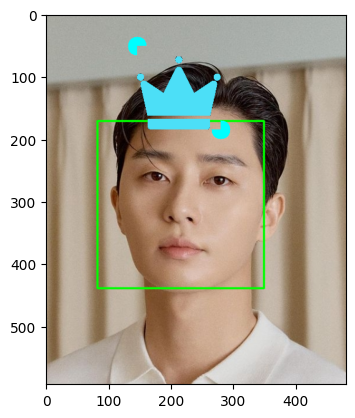

In [62]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 코의 index는 30
    x = landmark[30][0]
    # 코 기준으로 박스 영역 반만큼 올려서 씌울라고
    y = landmark[30][1] - dlib_rect.height()//2 - 60
    w = h = dlib_rect.width()

sticker = cv2.imread("king.png")
sticker = cv2.resize(sticker, (w // 2, h // 2))

tlx = x - (sticker.shape[1] // 2)
tly = y - (sticker.shape[0] // 2)
brx = x + (sticker.shape[1] // 2)
bry = y + (sticker.shape[0] // 2)

# Clip
tlx = tlx if tlx > 0 else 0
tly = tly if tly > 0 else 0

show = img.copy()
cv2.circle(show, (tlx, tly), 15, (0, 255, 255), -1 )
cv2.circle(show, (brx, bry), 15, (0, 255, 255), -1 )

sticker_area = img[tly:tly + sticker.shape[0], tlx:tlx + sticker.shape[1]]
show[tly:tly + sticker.shape[0], tlx:tlx + sticker.shape[1]] = \
     np.where(sticker==0, sticker_area, sticker).astype(np.uint8)
plt.imshow(show)

